# Exercise 1
MG Becongco <br>
Fundamentals of Machine Learning <br>
Learn how to clean data and to investigate distributions.

In [1]:
import seaborn as sns  
import pandas as pd  
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv("survey.csv")
df2 = pd.read_csv("steps.csv", delimiter=";")
step_col_count = df2.shape[1]
print('Steps column count: '+str(step_col_count))
df2['MeanSteps'] = df2.iloc[:, 1:step_col_count].mean(axis=1, skipna = True) #compute for mean steps before merging
df2.head()

Steps column count: 329


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,MeanSteps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [2]:
df = pd.merge(df1, df2, on = 'id')  # merge data
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,MeanSteps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [3]:
df3 = df[["id","city","gender","age","education_1","education","hh_size","height","weight", "MeanSteps"]] # create new dataframe dropping steps columns
df3["MeanSteps"].astype(float)  # Ensure that steps data is an float value
df3.head()

,id,city,gender,age,education_1,education,hh_size,height,weight,MeanSteps
0,1,Bordeaux,Male,25-34,Master or doctorate,4,4,178.0,98.0,10205.521212
1,2,Lille,Male,35-44,Bachelor,3,1,180.0,77.0,5687.423313
2,3,Montpellier,Male,25-34,Master or doctorate,2,2,180.0,83.0,8301.729730
3,4,Lyon,Male,<25,Bachelor,1,1,178.0,80.0,3633.200000
4,5,Montpellier,Female,25-34,Bachelor,4,3,167.0,61.0,5312.129630


 Dependent variable Y=Mean Steps <br>
 Potential Independent variable X=Gender, Height, Weight,Education <br>

In [4]:
# cleanup data
df4 = df3.drop(df[df3.MeanSteps  > 100000].index)  # Remove impossible values
df4.dropna() 
df4.head()


,id,city,gender,age,education_1,education,hh_size,height,weight,MeanSteps
0,1,Bordeaux,Male,25-34,Master or doctorate,4,4,178.0,98.0,10205.521212
1,2,Lille,Male,35-44,Bachelor,3,1,180.0,77.0,5687.423313
2,3,Montpellier,Male,25-34,Master or doctorate,2,2,180.0,83.0,8301.729730
3,4,Lyon,Male,<25,Bachelor,1,1,178.0,80.0,3633.200000
4,5,Montpellier,Female,25-34,Bachelor,4,3,167.0,61.0,5312.129630


Exploratory data analysis below: <br>
An analysis of mean steps per participant: <br>
Graphs of the distribution below: LinePlot (e.g., histogram, box plot, density plot, violin plot) <br>

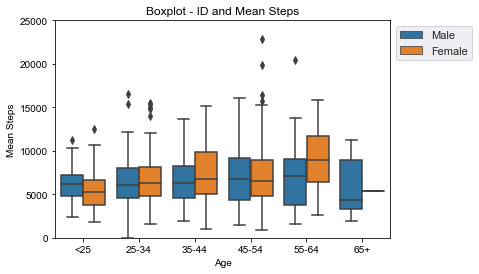

In [5]:
# mean steps per participant --> Graph of the distribution: BoxPlot
a = sns.boxplot(x="age", y="MeanSteps", hue="gender", order=["<25","25-34","35-44","45-54","55-64","65+"], data=df4)
a = (a.set(ylim=(0,25000)))
sns.set(rc={"figure.figsize":(13, 9)}) 
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.title('Boxplot - ID and Mean Steps')
plt.show(a)

Boxplot shows the following:<br> 
1. Females in the age of 55-64 has a mean steps higher than the rest of the age groups and gender. Though there are some outliers in the Female age group of 24-34 that has mean steps as high as the females in age group 55-64 <br>
2. Ages "<25" has mean steps that are much similar to both gender with male median steps higher than the female median steps. <br>

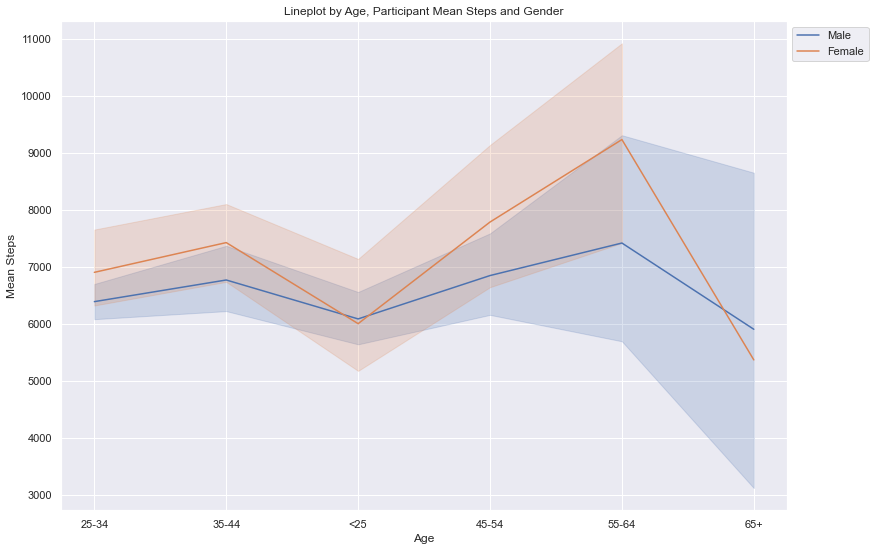

In [6]:
# lineplot
sns.lineplot(x="age", y="MeanSteps",hue="gender", data=df4)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Lineplot by Age, Participant Mean Steps and Gender')
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.show()

Lineplot indicates that the participants in the female group in the age group of "55-64" has the highest mean steps, and the lowest mean steps at the "<25" age group. The mean steps for all the groups are in between 4000 and 10000 steps. 

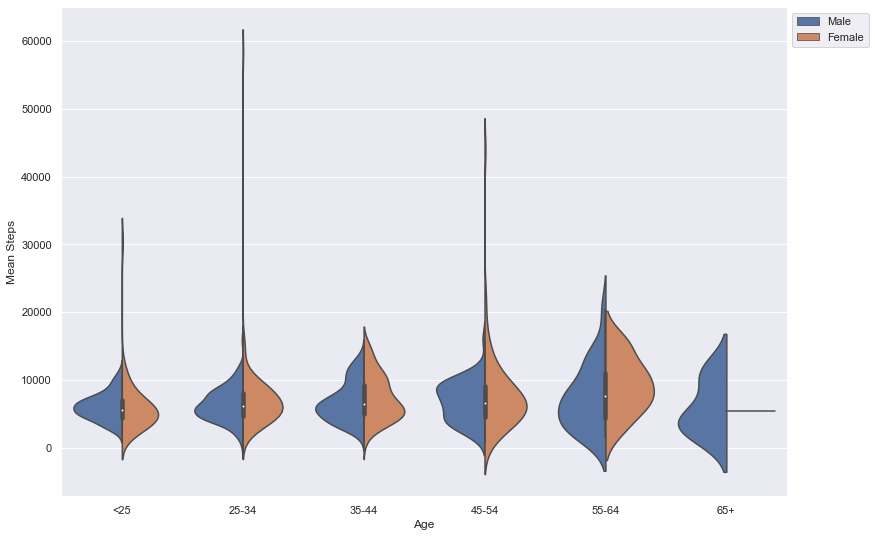

In [7]:
# violin plot
sns.violinplot(data=df4, x="age", y="MeanSteps", hue="gender",split=True, linewidth=1.5, order=["<25","25-34","35-44","45-54","55-64","65+"])
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.show()


The median of the median steps for age group 55-64 is the highest among all age groups. <br>
The distribution of the mean steps for the all the age group indicates that values are highly concentrated around the median.

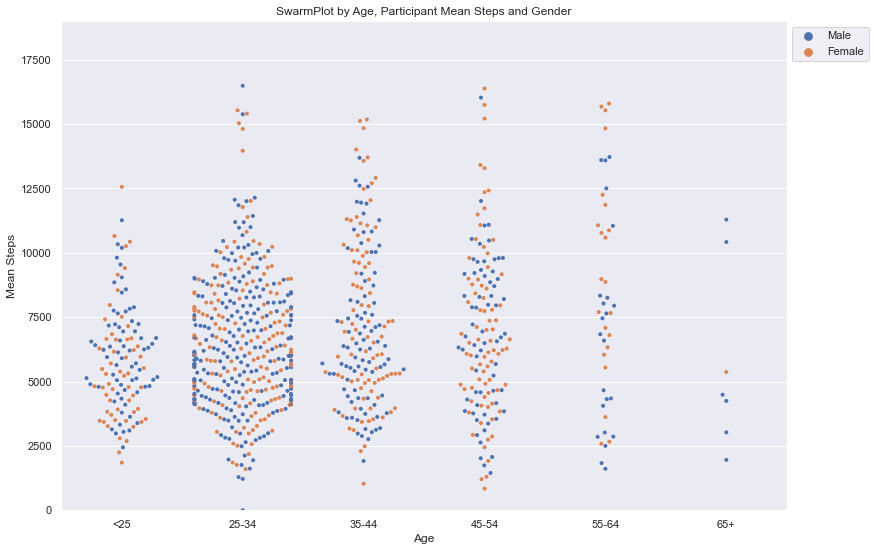

In [8]:
e = sns.swarmplot(x="age", y="MeanSteps", hue="gender", order=["<25","25-34","35-44","45-54","55-64","65+"], size=4, data=df4)
e = (e.set(ylim=(0,19000)))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('SwarmPlot by Age, Participant Mean Steps and Gender')
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.show(e)

Participants mean steps data is highly concentrated for the age group 25-34 indicating high participation in that age group. Less participation seen for age group 65+ and the highest value of mean steps can be seen in age group 25-34.

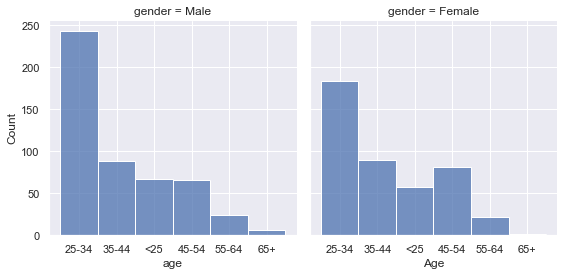

In [9]:
# distribution plot of df4
sns.displot(df4, x="age", col="gender", binwidth=3, height=4, facet_kws=dict(margin_titles=True), )
plt.xlabel("Age")
plt.ylabel("Gender")
plt.show()

There are more participants the 25-34 age groups for both genders. 

Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)


In [10]:
#Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
print('Participant Mean Steps: '+str(df4.loc[:,"MeanSteps"].mean()))
print('Participant Median Steps: '+str(df4.loc[:,"MeanSteps"].median()))  
print('Participant Standard Deviation: '+str(df4.loc[:,"MeanSteps"].std())) 

Participant Mean Steps: 6825.928380530858
Participant Median Steps: 6244.931601731601
Participant Standard Deviation: 3696.491961554726


Data distribution for tends to cluster in the median for all of the age groups regardles of gender. The age group 25-34 has the most participants. Though there are some outliers for groups up to 54. 

The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)


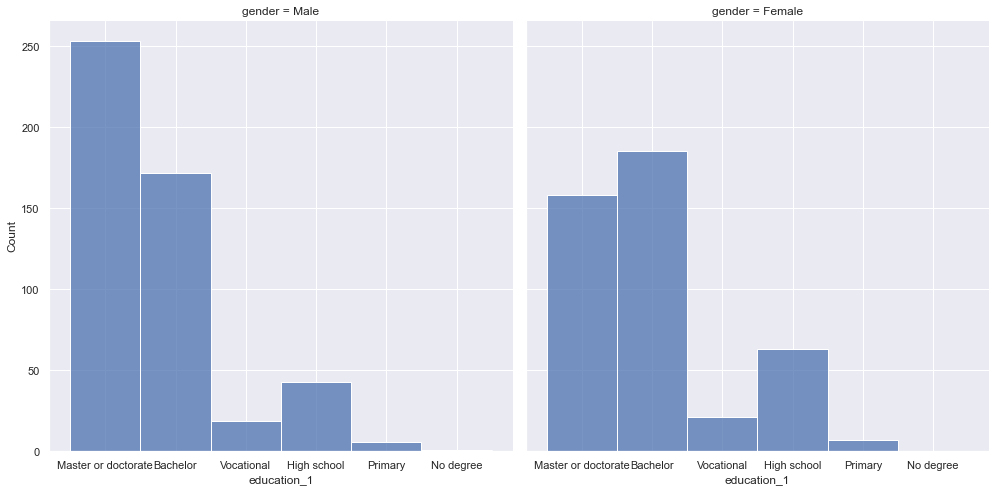

In [11]:
# distribution plot of Mean steps with reference to education and gender
sns.displot(df4, x="education_1", col="gender", binwidth=3, height=7, facet_kws=dict(margin_titles=True), )
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

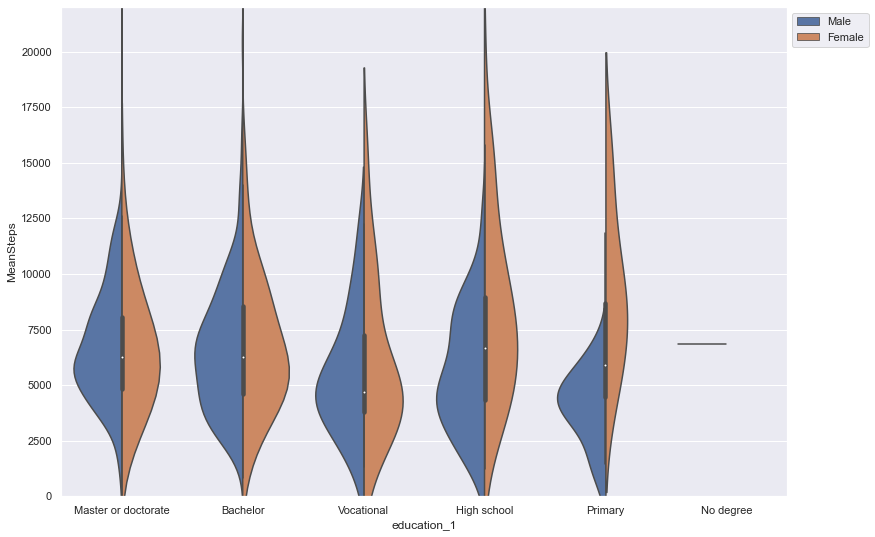

In [12]:
# violin plot of Mean steps with reference to education and gender
d = sns.violinplot(data=df4, x="education_1", y="MeanSteps", hue="gender",split=True, linewidth=1.5)
d =(d.set(ylim=(0,22000)))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show(d)

Highest user participation with Masters or Doctorate group for males, and bachelors for female. Data mostly congregate near the median except for the Primary education group. 